In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro
import matplotlib.animation as animation
df = pd.read_csv("sub-division_rainfall_act_dep_1901-2015.csv")

# Preprocessing
numeric_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
                  'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']
for col in numeric_months:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter only "Actual" data rows
df_actual = df[df['Parameter'] == 'Actual']

# Convert YEAR to numeric
df_actual['YEAR'] = pd.to_numeric(df_actual['YEAR'], errors='coerce')

<ipython-input-14-fff077369379>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['YEAR'] = pd.to_numeric(df_actual['YEAR'], errors='coerce')


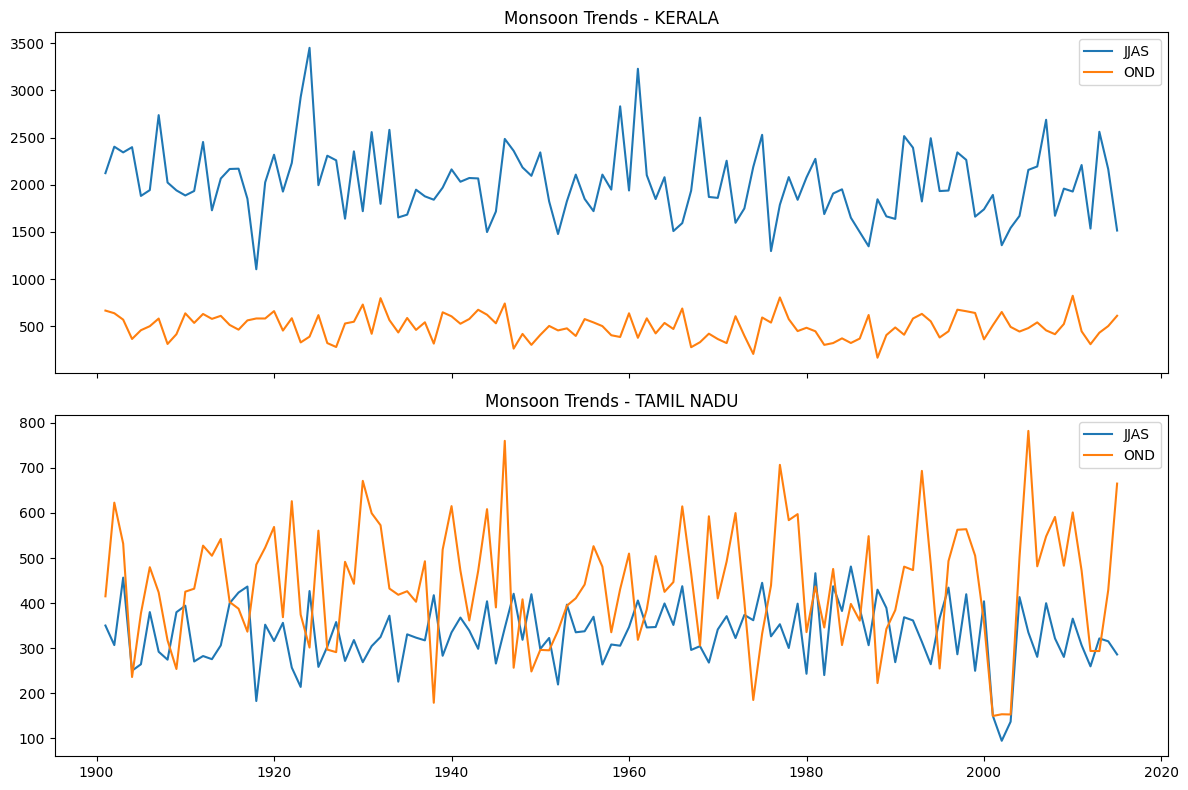

In [6]:
### Objective 1: Year-wise Seasonal Rainfall Trends for Kerala and Tamil Nadu
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
for i, state in enumerate(['KERALA', 'TAMIL NADU']):
    state_data = df_actual[df_actual['SUBDIVISION'].str.upper() == state.upper()]
    axs[i].plot(state_data['YEAR'], state_data['JJAS'], label='JJAS')
    axs[i].plot(state_data['YEAR'], state_data['OND'], label='OND')
    axs[i].set_title(f"Monsoon Trends - {state}")
    axs[i].legend()
plt.tight_layout()
plt.show()

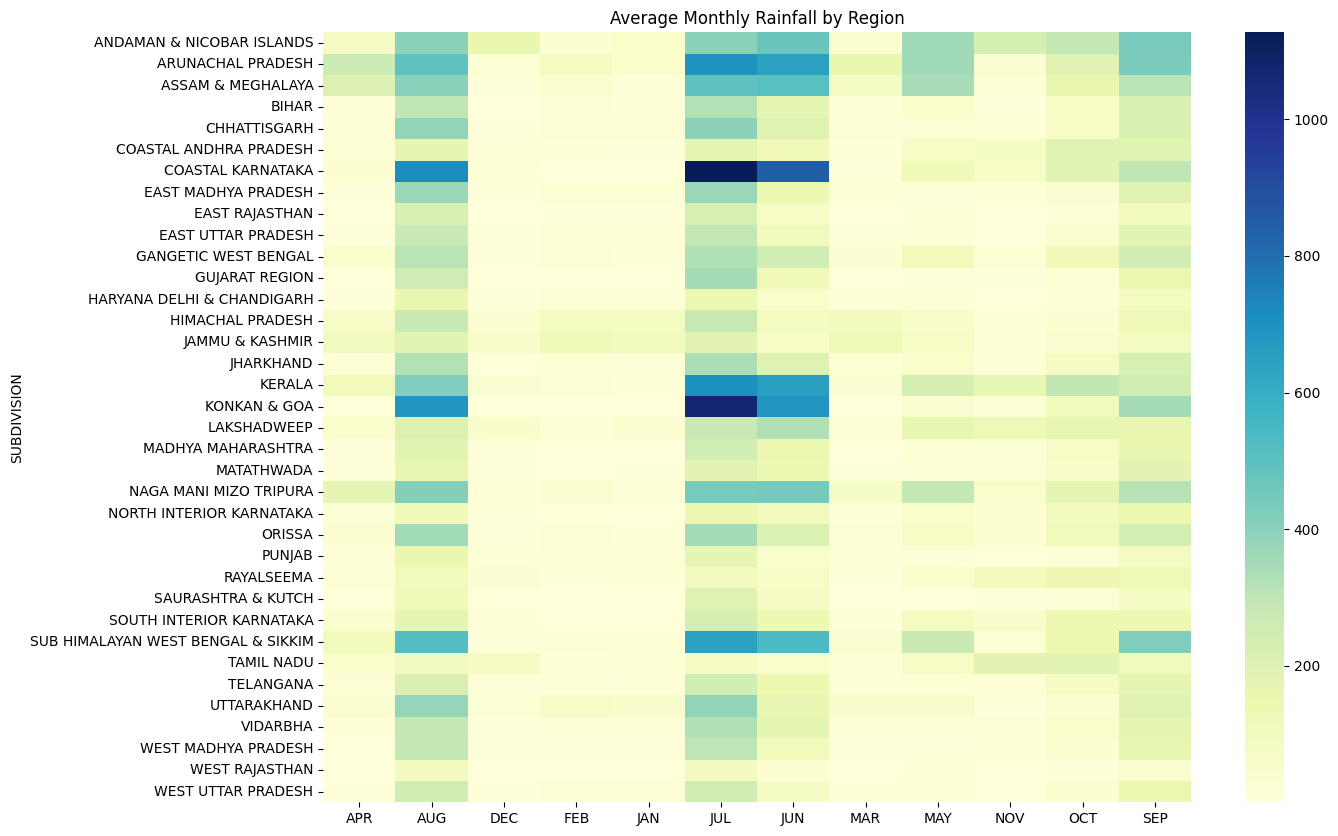

In [7]:
### Objective 2: Heatmap of Monthly Rainfall Across Indian Regions
pivot_df = df_actual.pivot_table(index='SUBDIVISION', values=numeric_months[:12], aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title("Average Monthly Rainfall by Region")
plt.show()

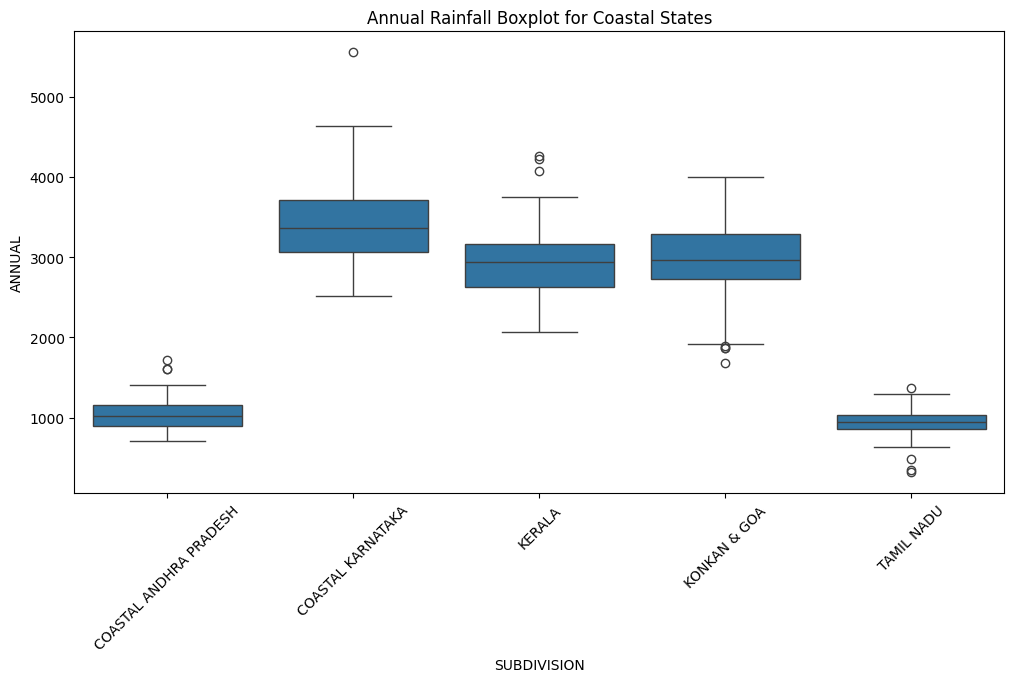

In [9]:
## Objective 3: Rainfall Boxplot Comparison of Coastal States
coastal_states = ['KERALA', 'TAMIL NADU', 'KONKAN & GOA', 'COASTAL ANDHRA PRADESH', 'COASTAL KARNATAKA']
subset = df_actual[df_actual['SUBDIVISION'].isin(coastal_states)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='SUBDIVISION', y='ANNUAL', data=subset)
plt.xticks(rotation=45)
plt.title("Annual Rainfall Boxplot for Coastal States")
plt.show()

t-test result for Kerala JJAS (pre vs post 2000): p-value = 0.2723


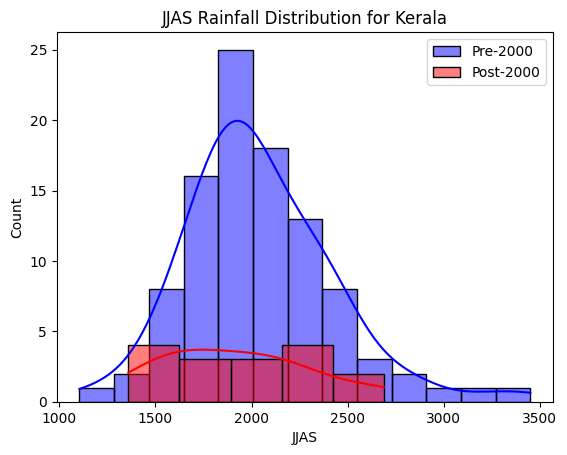

In [12]:
### Objective 4: t-test Before vs After 2000 for Kerala
kerala = df_actual[df_actual['SUBDIVISION'].str.upper() == 'KERALA']
pre = kerala[kerala['YEAR'] < 2000]['JJAS'].dropna()
post = kerala[kerala['YEAR'] >= 2000]['JJAS'].dropna()
stat, pval = ttest_ind(pre, post)
print(f"t-test result for Kerala JJAS (pre vs post 2000): p-value = {pval:.4f}")
sns.histplot(pre, color='blue', label='Pre-2000', kde=True)
sns.histplot(post, color='red', label='Post-2000', kde=True)
plt.legend()
plt.title("JJAS Rainfall Distribution for Kerala")
plt.show()

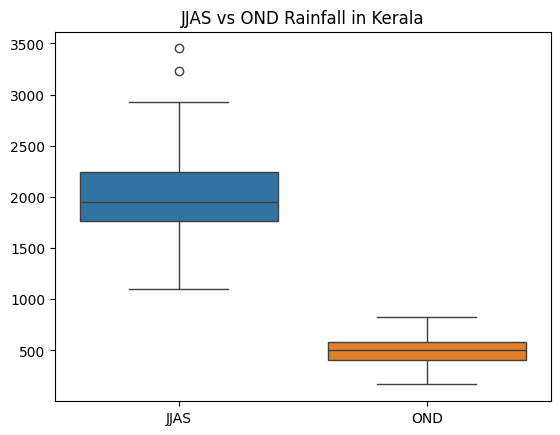

A/B Test (JJAS vs OND in Kerala): p = 0.0000


In [16]:

### Objective 5 A/B Test Between JJAS and OND (e.g., Kerala)
sns.boxplot(data=kerala[['JJAS', 'OND']])
plt.title("JJAS vs OND Rainfall in Kerala")
plt.show()

ab_stat, ab_pval = ttest_ind(kerala['JJAS'].dropna(), kerala['OND'].dropna())
print(f"A/B Test (JJAS vs OND in Kerala): p = {ab_pval:.4f}")


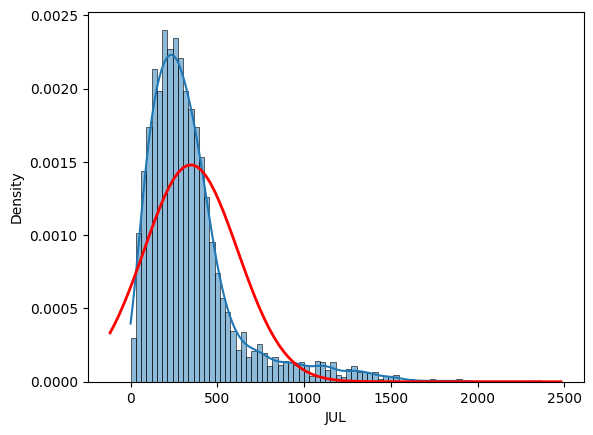

In [17]:
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sample_month = df[df['Parameter'] == 'Actual']['JUL'].dropna()
mean, std = stats.norm.fit(sample_month)

sns.histplot(sample_month, kde=True, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, mean, std), 'r', linewidth=2)
